# Liberies:

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
from numpy.random import randint
from numpy.random import rand
from scipy import stats

## My solution

In [9]:
import goodness_of_fit

# Data

In [10]:
df_facebook = pd.read_excel('facebook_degrees0.xlsx')
df_facebook = df_facebook.dropna()
df_houses = pd.read_csv('house_price.csv')
df_profit = pd.read_csv('CompanyABCProfit.csv')

In [11]:
not_normal_addition = pd.Series(5*[-1000])
new_profit = df_profit['Profit'].append(not_normal_addition)

# Expirements

## Facebook

In [12]:
data = df_facebook['degree unique'].sort_values(ascending=True).reset_index(drop=True)
degree_data = df_facebook['p(k)'].sort_values(ascending=False).reset_index(drop=True)

### Suggested Approach

>43, new best f() = 0.076228
>47, new best f() = 0.075340
>49, new best f() = 0.066993
>63, new best f() = 0.065533
>73, new best f() = 0.064327
Done!
f() = 0.064327
alpha estimate is 1.3770260218827168
length of p_pl found is 15
length original found is 57


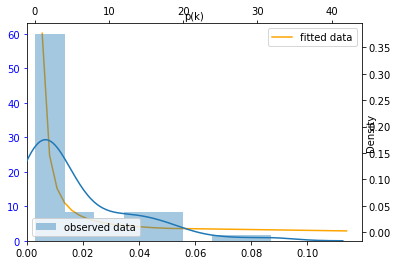

KS results are ks_test : 0.1168436842626831 and p_value : 0.9715962303679475


In [13]:
best = goodness_of_fit.find_empirical_dist('pl', data, emprical_dist=degree_data)

Done!
f() = 1.000000
lamnda estimate is 0.03680203045685279
length of p_exp found is 29
length original found is 57


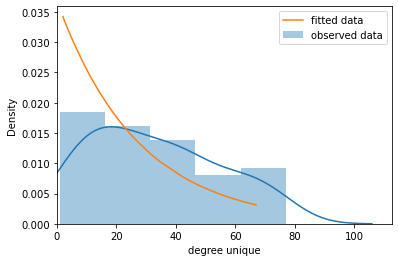

KS results are ks_test : 0.15899089720132398 and p_value : 0.41289208800372135


In [14]:
best = goodness_of_fit.find_empirical_dist('exp', data, emprical_dist=degree_data)

>0, new best f() = 0.090909
>2, new best f() = 0.074074
>3, new best f() = 0.068966
>19, new best f() = 0.066667
Done!
f() = 0.066667
mu estimate is 27.7 and sigma estimate is 16.36693821906427
length of p_normal found is 30
length original found is 57


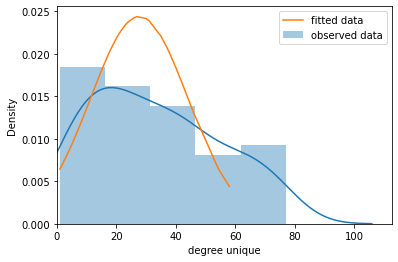

KS results are ks_test : 0.08172342160091783 and p_value : 0.9783964763069213


In [15]:
best = goodness_of_fit.find_empirical_dist('normal', data, emprical_dist=degree_data)

### Existed

#### power_law

In [16]:
result_alpha = goodness_of_fit.estimate_alpha(x=data,x_min=data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.powerlaw.cdf,args=(result_alpha,0))
print(f'No GA results: alpha is {result_alpha}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: alpha is 1.258797664213564; KS is 0.08446618924922433; p_value is 0.7792142848201293


#### normal

In [17]:
result_mu, result_sigma = stats._continuous_distns.norm.fit(data)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(data,stats._continuous_distns.norm.cdf,args=(result_mu,result_sigma))
print(f'No GA results: mu is {result_mu}; Sigma is {result_sigma}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: mu is 33.0; Sigma is 21.48030513684407; KS is 0.08388274445300248; p_value is 0.7861472740938166


#### exp

In [18]:
result_lambda = 1/(data.mean()-data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.expon.cdf,args=(0,1/result_lambda))
print(f'No GA results: Lambda is {result_lambda}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: Lambda is 0.03125; KS is 0.9692332344763441; p_value is 1.3234117160201349e-86


## House price

In [19]:
data = df_houses['SalePrice'][:250].sort_values(ascending=True).reset_index(drop=True)

### Suggested Approach

>1, new best f() = 0.102362
>1, new best f() = 0.099237
>1, new best f() = 0.088000
>3, new best f() = 0.081301
>5, new best f() = 0.079365
>7, new best f() = 0.076271
>8, new best f() = 0.070796
>9, new best f() = 0.070175
>9, new best f() = 0.069565
>10, new best f() = 0.068966
>12, new best f() = 0.060870
>13, new best f() = 0.060345
>14, new best f() = 0.059829
>15, new best f() = 0.059322
>16, new best f() = 0.058824
>17, new best f() = 0.052632
>18, new best f() = 0.052174
>18, new best f() = 0.051282
>28, new best f() = 0.043103
>29, new best f() = 0.042735
>35, new best f() = 0.042373
>65, new best f() = 0.042017
>76, new best f() = 0.041322
>81, new best f() = 0.040984
>87, new best f() = 0.040650
>90, new best f() = 0.040323
Done!
f() = 0.040323
mu estimate is 149891.34677419355 and sigma estimate is 41210.97438242759
length of p_normal found is 124
length original found is 250


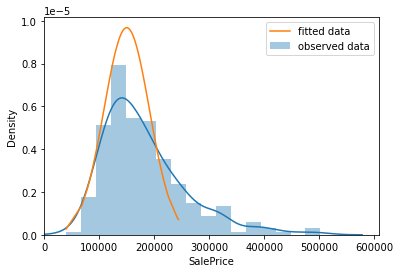

KS results are ks_test : 0.03917516013858108 and p_value : 0.9873994810733668


In [22]:
best = goodness_of_fit.find_empirical_dist('normal', data, emprical_dist=data)

>0, new best f() = 0.063893
>0, new best f() = 0.062498
>1, new best f() = 0.052741
>3, new best f() = 0.041449
>14, new best f() = 0.040434
>15, new best f() = 0.035098
>18, new best f() = 0.034876
Done!
f() = 0.034876
alpha estimate is 2.418428971416276
length of p_pl found is 126
length original found is 250


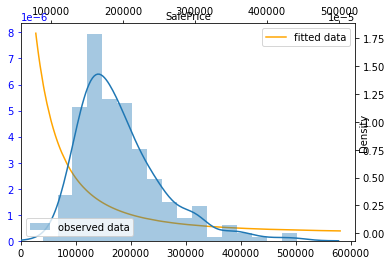

KS results are ks_test : 0.31467572694344836 and p_value : 1.37518033747243e-11


In [23]:
best = goodness_of_fit.find_empirical_dist('pl', data, emprical_dist=data)

Done!
f() = 1.000000
lamnda estimate is 7.233765159221747e-06
length of p_exp found is 121
length original found is 250


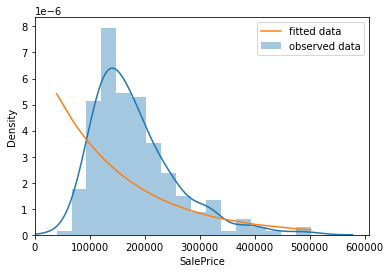

KS results are ks_test : 0.4445841209076403 and p_value : 2.5674683237268395e-22


In [24]:
best = goodness_of_fit.find_empirical_dist('exp', data, emprical_dist=data)

### Existed 

#### power_law

In [25]:
result_alpha = goodness_of_fit.estimate_alpha(x=data,x_min=data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.powerlaw.cdf,args=(result_alpha,0))
print(f'No GA results: alpha is {result_alpha}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: alpha is 1.6974709932142864; KS is 0.19241733178315662; p_value is 1.3955758611627873e-08


#### normal

In [26]:
result_mu, result_sigma = stats._continuous_distns.norm.fit(data)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(data,stats._continuous_distns.norm.cdf,args=(result_mu,result_sigma))
print(f'No GA results: mu is {result_mu}; Sigma is {result_sigma}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: mu is 181451.52; Sigma is 76050.9237682331; KS is 0.12015413896870475; p_value is 0.0013298857985101814


#### exp

In [27]:
result_lambda = 1/(data.mean()-data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.expon.cdf,args=(0,1/result_lambda))
print(f'No GA results: Lambda is {result_lambda}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: Lambda is 7.069559945343819e-06; KS is 0.9999929304650439; p_value is 0.0


## Profit

In [28]:
data = new_profit.sort_values(ascending=True).reset_index(drop=True)

### Suggested Approach

#### normal

>0, new best f() = 0.072165
>0, new best f() = 0.050505
>1, new best f() = 0.046296
>1, new best f() = 0.040000
>14, new best f() = 0.039604
Done!
f() = 0.039604
mu estimate is 969.960396039604 and sigma estimate is 457.0966472926484
length of p_normal found is 101
length original found is 205


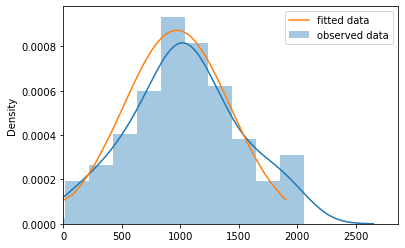

KS results are ks_test : 0.04099287744601787 and p_value : 0.9932285454414366


In [29]:
best = goodness_of_fit.find_empirical_dist('normal', data)

#### power-law

>2, new best f() = 0.020833
>4, new best f() = 0.020619
Done!
f() = 0.020619
alpha estimate is -6.475045386000852
length of p_pl found is 97
length original found is 205


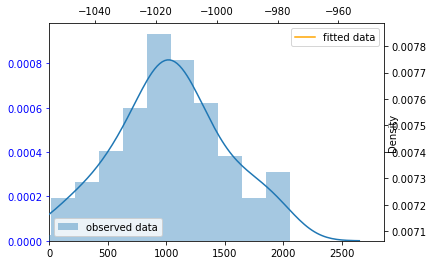

KS results are ks_test : nan and p_value : nan


In [37]:
best = goodness_of_fit.find_empirical_dist('pl', data, data)

#### exp

Done!
f() = 1.000000
lamnda estimate is 0.0004903331057332312
length of p_exp found is 107
length original found is 205


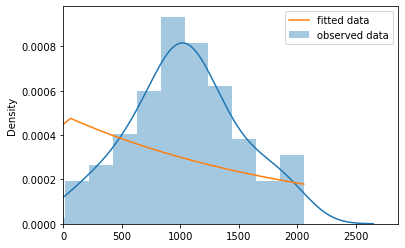

KS results are ks_test : 0.365081547596264 and p_value : 2.72775830466205e-13


In [31]:
best = goodness_of_fit.find_empirical_dist('exp', data)

### Existed

#### normal

In [32]:
result_mu, result_sigma = stats._continuous_distns.norm.fit(data)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(data,stats._continuous_distns.norm.cdf,args=(result_mu,result_sigma))
print(f'No GA results: mu is {result_mu}; Sigma is {result_sigma}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: mu is 972.6731707317073; Sigma is 573.0775502045801; KS is 0.07651009090492211; p_value is 0.1721962222916712


#### exp

In [33]:
result_lambda = 1/(data.mean()-data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.expon.cdf,args=(0,1/result_lambda))
print(f'No GA results: Lambda is {result_lambda}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: Lambda is 0.0005069263448385007; KS is 0.9994932021206127; p_value is 0.0


#### power-law

In [36]:
result_alpha = goodness_of_fit.estimate_alpha(x=data,x_min=data[0])
n_cdf = len(data)
y_cdf = list(np.arange(1, n_cdf+1) / n_cdf)
y_cdf.sort(reverse= True)
no_ga_ks_test, no_ga_p_value = stats.ks_1samp(y_cdf,stats._continuous_distns.powerlaw.cdf,args=(result_alpha,0))
print(f'No GA results: alpha is {result_alpha}; KS is {no_ga_ks_test}; p_value is {no_ga_p_value}')

No GA results: alpha is -8.0551786723665; KS is nan; p_value is nan
